# Análisis de Tendencias de YouTube para Estrategia de Negocios
## Por: Wilson Andrés Pinillo

### **Descripción del Conjunto de Datos:**
El [dataset](https://www.kaggle.com/datasets/datasnaek/youtube-new) contiene un registro diario de los videos más populares en YouTube de diferentes países. YouTube mantiene una lista de los videos más tendenciales, los cuales son seleccionados mediante una combinación de factores, que incluyen interacciones de los usuarios como el número de vistas, comentarios, compartidos y likes. Estos videos no son los más vistos del año, sino los que han destacado por su tendencia en un período específico. El conjunto de datos contiene información detallada para analizar su rendimiento y las características que los hacen populares.

### **Objetivo:**
El objetivo de este análisis es explorar las características que definen los videos más populares en YouTube y su relación con las interacciones de los usuarios. Específicamente, se busca responder a las siguientes preguntas:

¿Cuáles son las categorías de videos que reciben mayores vistas y likes?
¿Es posible encontrar agrupaciones o clasificaciones entre los videos más populares?
¿Cuáles son las combinaciones de características o atributos que influyen en que un video sea tendencia?
¿La temporada o la fecha de publicación del video tiene alguna influencia en su popularidad?
¿Es posible predecir la cantidad de likes o vistas que un video tendrá en función de sus características? Para ello, se creará un modelo predictivo que permita estimar estos valores.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import zipfile
import os
import json

In [ ]:
# Cargar el archivo CSV de US videos
zip_path = 'USvideos.csv.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open('USvideos.csv') as file:
        df_videos = pd.read_csv(file)

df_videos.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
# Cargar el archivo JSON con las categorías y convertir en dataframe de pandas
json_path = 'US_category_id.json'

with open(json_path, 'r') as f:
    categories = json.load(f)

df_categories = pd.DataFrame([{
    'category_id': item['id'],
    'category_title': item['snippet']['title']
} for item in categories['items']])

df_categories['category_id'] = df_categories['category_id'].astype(int)
df_categories.head()


,category_id,category_title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [ ]:
# Missing categories in df_videos
video_categories = df_videos['category_id'].unique()
category_categories = df_categories['category_id'].unique()
missing_categories = set(video_categories) - set(category_categories)

print("Categories in df_videos but missing in df_categories:", missing_categories)


Categories in df_videos but missing in df_categories: set()


In [ ]:
# Unir dataframe de videos con descripción de categorias
video_data = df_videos.merge(df_categories, how='inner', on='category_id')


## Análisis Exploratorio de Datos

In [ ]:
# Tamaño del dataset
video_data.shape

(40949, 17)

In [ ]:
# Número de videos únicos
video_data.video_id.nunique()

6351

In [ ]:
# Información del dataframe
video_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [ ]:
# Cálculo de algunas estadísticas generales
video_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
category_id,40949.0,1.997243e+01,7.568327e+00,1.0,17.0,24.0,25.0,43.0
views,40949.0,2.360785e+06,7.394114e+06,549.0,242329.0,681861.0,1823157.0,225211923.0
likes,40949.0,7.426670e+04,2.288853e+05,0.0,5424.0,18091.0,55417.0,5613827.0
dislikes,40949.0,3.711401e+03,2.902971e+04,0.0,202.0,631.0,1938.0,1674420.0
comment_count,40949.0,8.446804e+03,3.743049e+04,0.0,614.0,1856.0,5755.0,1361580.0


Los resultados muestran una gran variabilidad (rango y desviación estándar) en las métricas de interacción con los videos. Aunque el promedio de **vistas** es de 2.37 millones, la **desviación estándar** de 7.43 millones sugiere que algunos videos tienen muchísimas más vistas que otros, con un máximo de 225 millones. Lo mismo ocurre con los likes, con un promedio es de 74,617, pero con un máximo de 5.6 millones y una **alta dispersión**. En cuanto a los **dislikes** y los **comentarios**, la mayoría de los videos tienen pocos de ambos, pero existen casos extremos, como un video con 1.64 millones de dislikes y otro con 1.23 millones de comentarios. En general, los datos reflejan una distribución altamente desigual.

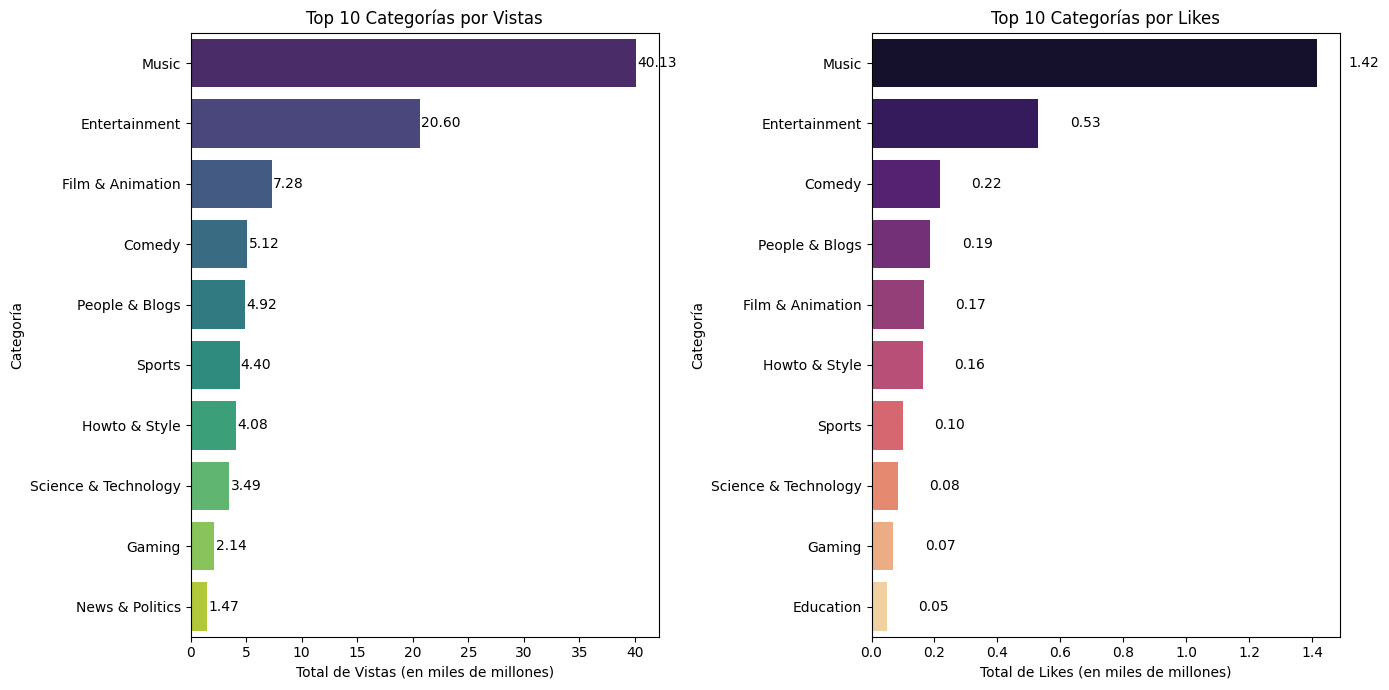

In [ ]:
# Categorías con más visitas y likes
category_views_likes = video_data.groupby('category_title')[['views', 'likes']].sum()
top_categories_by_views = category_views_likes.sort_values(by='views', ascending=False).head(10)
top_categories_by_likes = category_views_likes.sort_values(by='likes', ascending=False).head(10)

plt.figure(figsize=(14, 7))

# Gráfico del top 10 categorías por vistas
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=top_categories_by_views['views'] / 1e9, y=top_categories_by_views.index, hue=top_categories_by_views.index, palette='viridis', legend=False)
plt.title('Top 10 Categorías por Vistas')
plt.xlabel('Total de Vistas (en miles de millones)')
plt.ylabel('Categoría')

for p in ax1.patches:
    ax1.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', color='black')

# Gráfico del top 10 categorías por likes
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=top_categories_by_likes['likes'] / 1e9, y=top_categories_by_likes.index, hue=top_categories_by_likes.index, palette='magma', legend=False)
plt.title('Top 10 Categorías por Likes')
plt.xlabel('Total de Likes (en miles de millones)')
plt.ylabel('Categoría')

for p in ax2.patches:
    ax2.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


La categoría **Música** es la más popular en YouTube, con más de 40,000 millones de vistas y 1,416 millones de likes, seguida de **Entretenimiento** con 20,600 millones de vistas y 530 millones de likes. Otras categorías destacadas son Film & Animation y Comedy, que también generan millones de vistas e interacciones.

Al analizar las categorías por likes entramos que **Música** y **Entretenimiento** continuan siendo las más relevantes.Comedy, People & Blogs, y Film & Animation también tienen cifras destacadas.

**Diferencias:** La diferencia entre vistas y likes es más grande en **Música**, lo que sugiere que, aunque alcanza un gran número de vistas, la tasa de interacción (en términos de likes) es relativamente menor. En cambio, categorías como **Comedia** y **Cine y Animación** muestran un volumen de vistas considerable, pero la diferencia entre vistas y likes es más pequeña, lo que indica que los videos en estas categorías reciben una mayor tasa de interacción por vista.


## Procesamiento de datos

En la fase de preprocesamiento de datos, se eliminan columnas irrelevantes y se tratan los valores faltantes. Se transforman las variables de tiempo para extraer componentes temporales (día, mes, año, día de la semana) y el número de días en tendencia. Se codifican las variables categóricas sin usar LabelEncoder para evitar asignar valores arbitrarios. Adicionalmente, se aplica PCA para reducir la dimensionalidad de los datos y mejorar la eficiencia del modelo.

### ¿La temporada o fecha en la que el video es publicado tiene alguna influencia?

In [ ]:
# Análisis de vistas según mes y día de la semana de publicación
video_data['publish_time'] = pd.to_datetime(video_data['publish_time'])
video_data['publish_month'] = video_data['publish_time'].dt.month
video_data['publish_weekday'] = video_data['publish_time'].dt.weekday
video_data['trending_date'] = pd.to_datetime(video_data['trending_date'], format='%y.%d.%m')
video_data['publish_day'] = video_data['publish_time'].dt.date
video_data['publish_time_only'] = video_data['publish_time'].dt.time

# Agrupar por 'video_id'
aggregated_data = video_data.groupby('video_id').agg(

    days_to_trend=('trending_date', lambda x: (x.min() - x.iloc[0]).days),
    trending_days=('trending_date', 'nunique'),
    total_views=('views', 'sum'),
    total_likes=('likes', 'sum'),
    total_dislikes=('dislikes', 'sum'),
    total_comments=('comment_count', 'sum'),
    publish_month=('publish_month', 'first'),
    publish_weekday=('publish_weekday', 'first'),
    category_id=('category_id', 'first'),
    publish_day=('publish_day', 'first'),
    publish_time_only=('publish_time_only', 'first')
).reset_index()


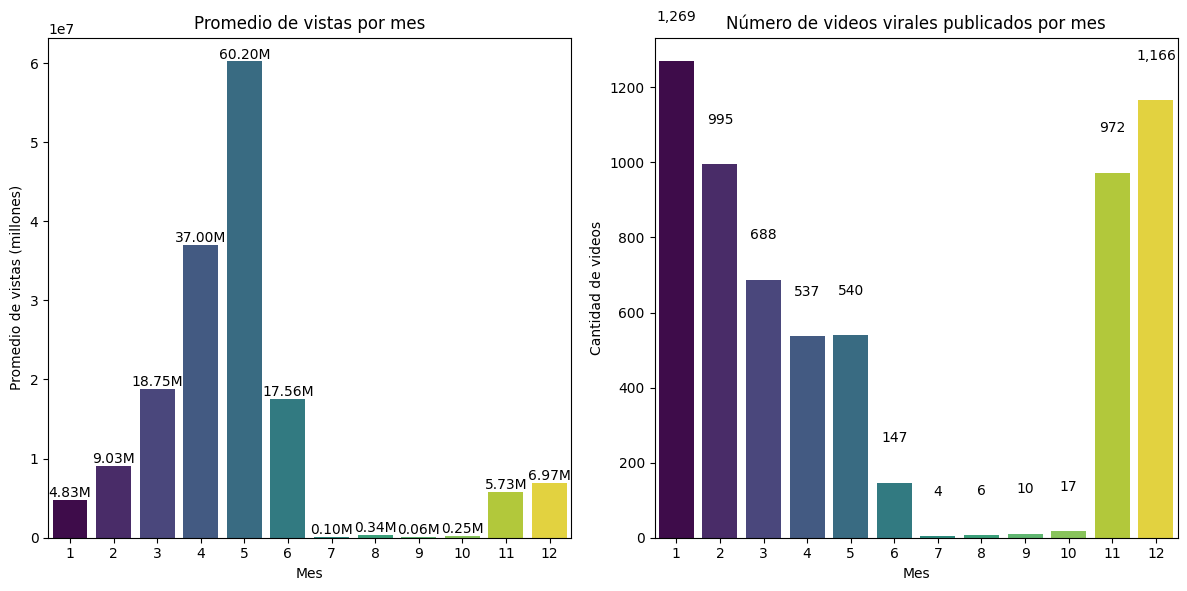

In [ ]:
# Calcular el promedio de vistas y núm videos publicados por mes y día de la semana
month_stats = aggregated_data.groupby('publish_month').agg(
    avg_views=('total_views', 'mean'),
    video_count=('video_id', 'count')
)

weekday_stats = aggregated_data.groupby('publish_weekday').agg(
    avg_views=('total_views', 'mean'),
    video_count=('video_id', 'count')
)

# Graficar por mes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=month_stats.index, y=month_stats['avg_views'], hue=month_stats.index, palette='viridis', legend=False)
plt.title('Promedio de vistas por mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de vistas (millones)')
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height() + 1000, f'{p.get_height() / 1e6:.2f}M', ha='center', va='bottom', color='black')

plt.subplot(1, 2, 2)
sns.barplot(x=month_stats.index, y=month_stats['video_count'], hue=month_stats.index, palette='viridis', legend=False)
plt.title('Número de videos virales publicados por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de videos')
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height() + 100, f'{int(p.get_height()):,}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()



Los resultados muestran una clara estacionalidad en las vistas y la cantidad de videos publicados. El promedio de vistas alcanza su punto máximo en **mayo** con 60.2 millones, seguido de una caída significativa en verano, especialmente en **julio** y **agosto**, donde se publican pocos videos. A partir de **septiembre**, las vistas y la cantidad de videos se recuperan, pero no alcanzan los niveles de los primeros meses del año. Este patrón sugiere que la producción de contenido influye directamente en las vistas, con un pico de actividad a principios de año y una desaceleración durante el verano.

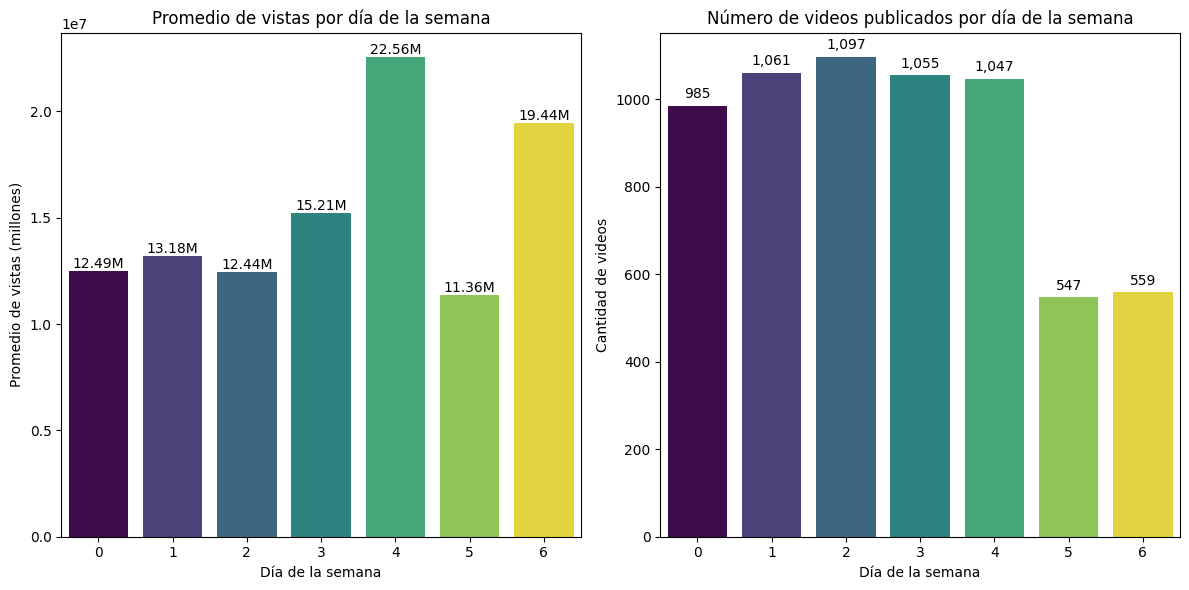

In [ ]:
# Graficar por día de la semana
plt.figure(figsize=(12, 6))

# Subplot para el promedio de vistas por día de la semana
plt.subplot(1, 2, 1)
sns.barplot(x=weekday_stats.index, y=weekday_stats['avg_views'], hue=weekday_stats.index, palette='viridis', legend=False)
plt.title('Promedio de vistas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Promedio de vistas (millones)')
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height() + 1000, f'{p.get_height() / 1e6:.2f}M', ha='center', va='bottom', color='black')

# Subplot para el número de videos publicados por día de la semana
plt.subplot(1, 2, 2)
sns.barplot(x=weekday_stats.index, y=weekday_stats['video_count'], hue=weekday_stats.index, palette='viridis', legend=False)
plt.title('Número de videos publicados por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de videos')
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height() + 10, f'{int(p.get_height()):,}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()



Los promedios de vistas son más altos a mitad de semana, alcanzando su pico el viernes con 22.6 millones de vistas, mientras que los sábados tienen el promedio más bajo con 11.4 millones. En cuanto a la cantidad de videos publicados, se observa una tendencia estable durante la semana laboral, rondando los 1,000 videos por día,seguido de un descenso notable el fin de semana. La actividad de publicación es mayor durante los días laborales y disminuye hacia el fin de semana.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def data_preprocessing(data, y) -> pd.DataFrame:

    # Separar las características y la variable dependiente
    X = data.drop([y, 'video_id'], axis=1, errors='ignore')
    y = data[[y]]

    X['publish_day'] = pd.to_datetime(X['publish_day'], errors='coerce')
    X['publish_day_day'] = X['publish_day'].dt.day
    X['publish_day_month'] = X['publish_day'].dt.month
    X['publish_day_year'] = X['publish_day'].dt.year
    X['publish_day_dow'] = X['publish_day'].dt.weekday
    X['publish_day_delta'] = (X['publish_day'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
    X = X.drop('publish_day', axis=1)
    X['publish_time_only'] = pd.to_datetime(X['publish_time_only'], format='%H:%M:%S')
    X['publish_time_seconds'] = X['publish_time_only'].dt.hour * 3600 + X['publish_time_only'].dt.minute * 60 + X['publish_time_only'].dt.second
    X = X.drop('publish_time_only', axis=1)

    # Identificar las columnas categóricas
    categorical_cols = ['publish_month', 'publish_weekday', 'category_id']
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

    # Estandarizar los datos
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(
        data=scaler.fit_transform(X),
        columns=X.columns
    )

    # Partición de los datos
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    return X_train, X_test, y_train, y_test


In [ ]:
# Procesamiento de los datos
X_train, X_test, y_train, y_test = data_preprocessing(aggregated_data, 'total_views')

## Importancia de Características

Identificar y seleccionar las características más relevantes que contribuyen al poder predictivo del modelo.

### ¿Cuál es la combinación de características o atributos más importantes que hacen de un video tendencia?

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def get_important_features(X_train, y_train, threshold=0.95):

    # Ajustar el modelo RandomForestRegressor
    model_fi = RandomForestRegressor(random_state=42)
    model_fi.fit(X_train, y_train)

    # Obtener la importancia de las características
    importance = model_fi.feature_importances_

    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    feature_importance_df['cumulative_importance'] = feature_importance_df['Importance'].cumsum()

    important_features = feature_importance_df[feature_importance_df['cumulative_importance'] <= threshold]['Feature'].tolist()

    return feature_importance_df, important_features


In [ ]:
# Características más importantes
feature_importance_df, important_features = get_important_features(X_train, y_train, threshold=0.95)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


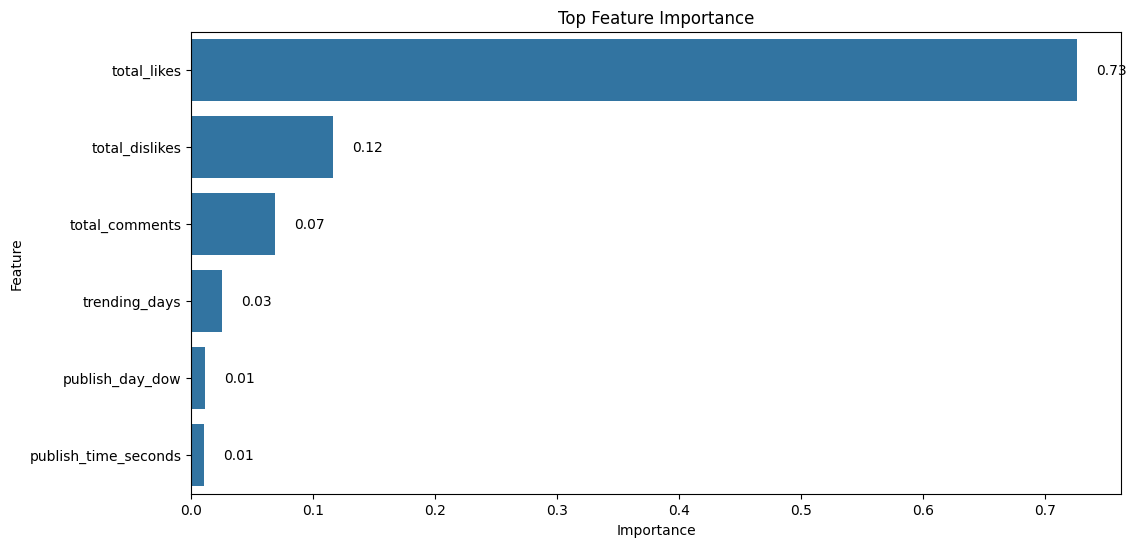

In [ ]:
# Graficar las características más importantes
top_features = feature_importance_df.head(6)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Importance', y='Feature', data=top_features.sort_values(by='Importance', ascending=False))

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width() + 0.01, p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=10)

plt.title('Top Feature Importance')
plt.show()


El aspecto más importante para que un video se vuelva tendencia se basa principalmente en la **interacción** del público, siendo los **likes** el factor más relevante, ya que un alto número de estos indica aceptación positiva. Los dislikes también juegan un papel, aunque su impacto es menor, ya que un bajo número de ellos contribuye al éxito del video. Los **comentarios** son otro indicador clave, ya que un alto número sugiere que el video está generando conversación y visibilidad. Aunque el **tiempo en tendencia** y el **día/hora** de publicación también tienen algo de influencia, su impacto es secundario en comparación con las interacciones directas con el video.

### ¿Es posible encontrar agrupaciones o clasificaciones de videos?

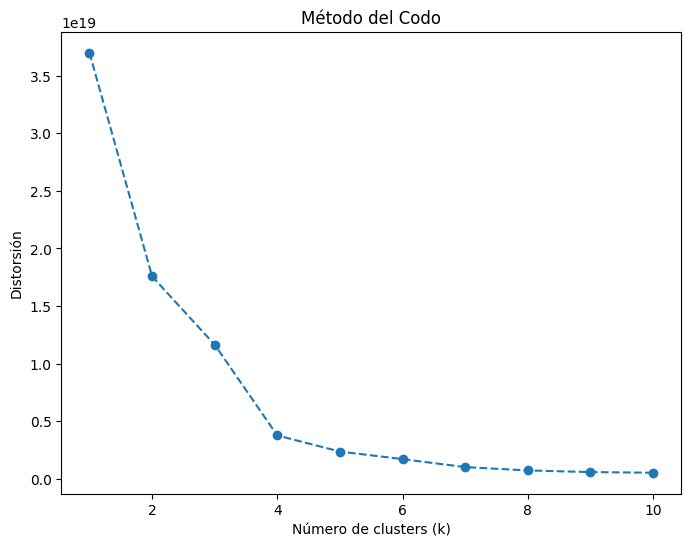

In [ ]:
from sklearn.cluster import KMeans

# Seleccionar las características numéricas para el clustering
features = ['total_views', 'days_to_trend', 'trending_days', 'total_likes', 'total_dislikes', 'total_comments', 'category_id']
X_kmeans = aggregated_data[features]

# Calcular la distorsión para diferentes valores de k
distorsiones = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_kmeans)
    distorsiones.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distorsiones, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distorsión')
plt.show()



Siendo k el número de agrupaciones (clústers), la distorsión disminuye rápidamente de k=1 a k=3, a partir de k=4, la disminución en la distorsión se vuelve más lenta, sugiriendo que agregar más clusters tiene un impacto marginal. Esto sugiere que el **número óptimo** de clusters es probablemente **4**, ya que a partir de ese punto la mejora en el modelo es mínima.

In [ ]:
# KMeans con k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_kmeans)

aggregated_data['Cluster'] = kmeans.labels_

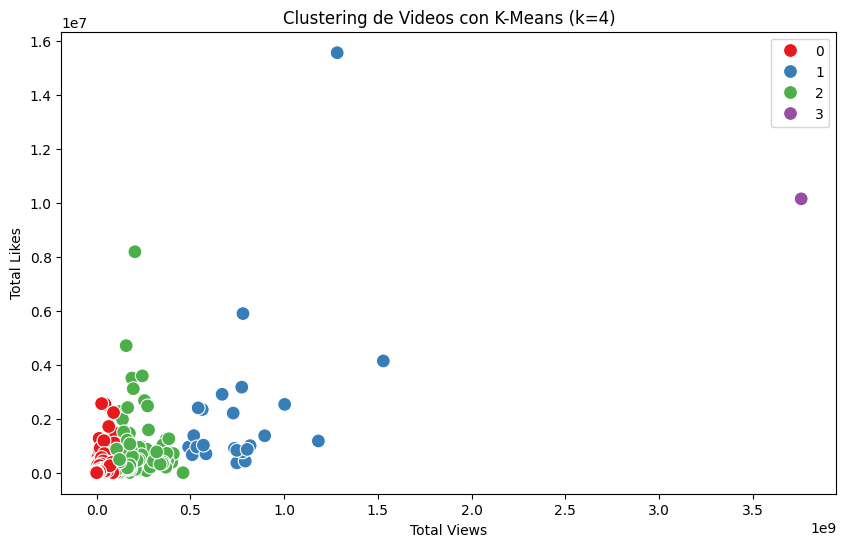

In [ ]:
# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_views', y='total_comments', hue='Cluster', data=aggregated_data, palette='Set1', s=100, marker='o')

plt.title("Clustering de Videos con K-Means (k=4)")
plt.xlabel("Total Views")
plt.ylabel("Total Likes")
plt.legend()
plt.show()


### Selección de Modelo

En la sección de selección de modelo, se evaluarán varios algoritmos para predecir cuántas vistas tendrá un video, comenzando con la regresión lineal como modelo base. Adicionalmente, se implementará Random Forest Regressor, que es una versión de Random Forest adaptada para tareas de regresión y el MLPRegressor.

### ¿Es posible predecir cuántos likes o visitas tendrá un video? Si es así, crea un modelo que lo compruebe.

In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir dimensionalidad
n_components = 2
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])


**Regresión Lineal (Modelo Base)**

El modelo base se selecciona mediante búsqueda en rejilla combinada con validación cruzada para garantizar una afinación robusta de los hiperparámetros. El modelo está configurado para tener en cuenta los desequilibrios de clase

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

def grid_search_cv_linear_regression():

    # Definir los posibles valores de parámetros a buscar
    grid_values = {'fit_intercept': [True, False], 'copy_X': [True, False]}

    # Crear el modelo de regresión lineal
    lr = LinearRegression()

    # Realizar GridSearchCV con validación cruzada de 3 particiones
    lr_custom = GridSearchCV(lr, param_grid=grid_values, scoring='neg_mean_squared_error', cv=3)
    lr_custom.fit(X_train_pca_df, y_train)

    print(f"Best Params: {lr_custom.best_params_}")
    print(f"Best Score (Negative Mean Squared Error): {lr_custom.best_score_}")

    return lr_custom

# GridSearchCV for Linear Regression
linear_regression_grid_search_results = grid_search_cv_linear_regression()
linear_regression = linear_regression_grid_search_results.best_estimator_

# Calcular métricas de rendimiento
y_pred = linear_regression.predict(X_test_pca_df)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print("Linear Regression Results:", f"MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")


Best Params: {'copy_X': True, 'fit_intercept': True}
Best Score (Negative Mean Squared Error): -3161408280596926.5
Linear Regression Results: MSE: 1130466041155851.00, R2: 0.67


El error cuadrático medio (MSE) obtenido es relativamente bajo, lo que sugiere que las predicciones están bastante cerca de los valores reales, y el valor de **R²** de 0.67 indica que el modelo explica el **67%** de la **variabilidad** en los datos. En resumen, el modelo sirve como linea base para comparar otros modelos.

#### Perceptrón Multicapa (MLP)

El mejor modelo de MLP se selecciona probando diferentes hiperparámetros utilizando diversos solucionadores (Adam y SGD) y tasas de aprendizaje adaptativas. Después de escalar los datos, se entrenan múltiples modelos con diferentes configuraciones. Su rendimiento se evalúa en función de la precisión y la pérdida durante el entrenamiento, y los resultados se visualizan a través de curvas de pérdida para identificar los parámetros óptimos.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.exceptions import ConvergenceWarning
import joblib

# Evaluar el desempeño del modelo
def multi_layer_perceptron_regressor(X, y, name):
    print("\nLearning on %s" % name)

    mlps = []
    best_model = None
    best_score = -float('inf')

    params = [
        {"solver": "adam", "learning_rate": "adaptive", "learning_rate_init": 0.01},
        {"solver": "adam", "learning_rate": "adaptive", "learning_rate_init": 0.03},
        {"solver": "adam", "learning_rate": "adaptive", "learning_rate_init": 0.05},
    ]

    labels = [
        "Adam - adaptive learning-rate 0.01",
        "Adam - adaptive learning-rate 0.03",
        "Adam - adaptive learning-rate 0.05",
    ]

    for label, param in zip(labels, params):
        print("Training: %s" % label)

        # Crear el modelo MLPRegressor
        mlp = MLPRegressor(
            hidden_layer_sizes=(64, 32),
            **param,
            max_iter=1000,
            activation='relu',
            tol=0.0001,
            random_state=42
        )

        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            mlp.fit(X, y)

        mlps.append(mlp)

        # Predicciones y evaluación del modelo
        y_pred = mlp.predict(X)
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        print(f"Training set MSE: {mse:.4f}")
        print(f"Training set R2: {r2:.4f}")
        print("Training set loss: %f" % mlp.loss_)

        # Guardar el modelo si es el mejor score
        if r2 > best_score:
            best_score = r2
            best_model = mlp

    # Guardar el mejor modelo
    if best_model:
        joblib.dump(best_model, 'best_mlp_regressor_model.pkl')
        print(f"Best model saved with R2 score of {best_score:.4f}")

    # Graficar la curva de pérdida para cada modelo
    for mlp, label in zip(mlps, labels):
        plt.plot(mlp.loss_curve_, label=label)

    plt.legend()
    plt.title('Curvas de Pérdida de los Modelos MLP')
    plt.xlabel('Número de Iteraciones')
    plt.ylabel('Pérdida')
    plt.show()



Learning on Regresión de Visitas en Videos
Training: Adam - adaptive learning-rate 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set MSE: 2163374375924470.0000
Training set R2: 0.6627
Training set loss: 1082578064719068.875000
Training: Adam - adaptive learning-rate 0.03


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set MSE: 2163075875447318.5000
Training set R2: 0.6627
Training set loss: 1082357491753288.375000
Training: Adam - adaptive learning-rate 0.05


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set MSE: 2157095133516523.5000
Training set R2: 0.6636
Training set loss: 1079779004720696.000000
Best model saved with R2 score of 0.6636


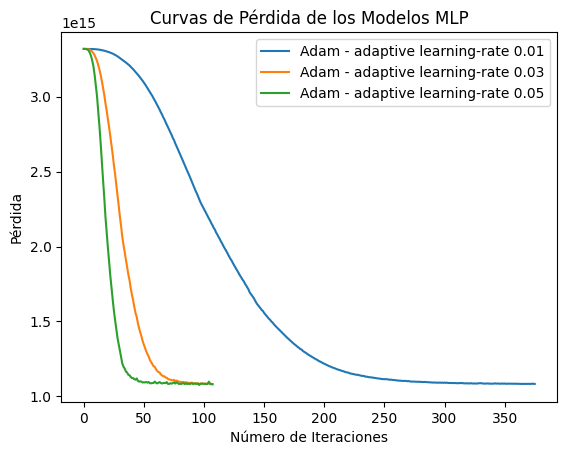

In [ ]:
# Visualizar el desempeño y guardar el mejor modelo
multi_layer_perceptron_regressor(X_train_pca_df, y_train, "Regresión de Visitas en Videos")

El modelo MLP con el optimizador Adam y tasas de aprendizaje de 0.05 ha mostrado ser el mejor configurado para la regresión de visitas en videos, alcanzando un valor de R2 de 0.6636, lo cual indica que el modelo tiene una capacidad decente para predecir las visitas a partir de las características del video. Aunque existen mejoras que pueden hacerse en el preprocesamiento de los datos, esta combinación de modelo y parámetros es efectiva para el problema en cuestión.